In [30]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt

sns.set()

In [149]:
dataset= pd.DataFrame(load_boston().data, columns=load_boston().feature_names)
dataset['price'] = load_boston().target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


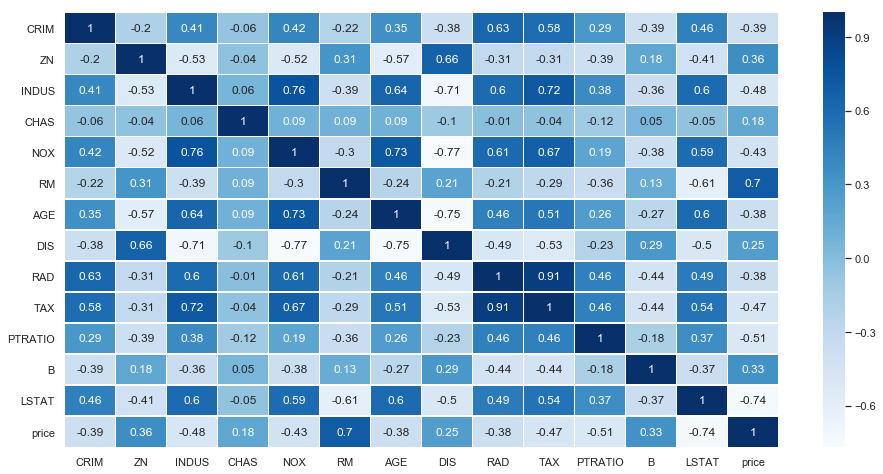

In [32]:
correlation_matrix = dataset.corr().round(2)

plt.figure(figsize = (16,8))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, cmap="Blues")
plt.show()

In [140]:
feature_names = abs(correlation_matrix['price'])

features = feature_names[feature_names>0.50]

features

RM         0.70
PTRATIO    0.51
LSTAT      0.74
price      1.00
Name: price, dtype: float64

In [160]:
relevant_features = ['LSTAT']

X = dataset[relevant_features]

print(type(X), X.shape)
y = dataset['price']

<class 'pandas.core.frame.DataFrame'> (506, 1)


In [158]:
def getting_parameter(X, y):
    
    print(X.shape)
    ones_constructed = np.hstack((np.ones((X.shape[0], 1)), X))
    params = np.linalg.inv(np.dot(ones_constructed.T, ones_constructed))
    return np.dot(params, np.dot(ones_constructed.T, y))

In [165]:
params = getting_parameter(X,y)
predict= params



params[0]

(506, 1)


34.55384087938307

In [170]:
predicted_X = params[0] + np.dot(params[1], X['LSTAT']) 
print(params[1])
print(X.shape)

-0.950049353757989
(506, 1)


In [167]:
predicted_X.shape

(506,)

In [168]:
print(mean_squared_error(y, predicted_X))

38.48296722989415


In [156]:
def plot(X, y):
    plt.scatter(X, y)
    plt.plot(X, predicted_X, 'r--')

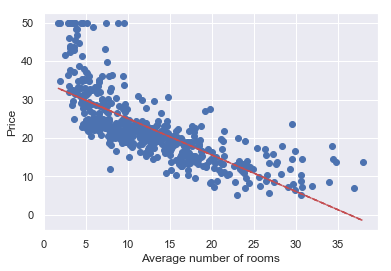

In [157]:
plot(X,y)

plt.xlabel('Average number of rooms')
plt.ylabel('Price')
plt.show()